\newpage

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### **1. Classification Problem Identification**

Dataset is used from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

In this assignment, machine learning (ML) techniques have been deployed to predict, diagnose, and treat chronic kidney disease (CKD). 

In [3]:
## Load Dataset
data_url = 'https://archive.ics.uci.edu/static/public/336/data.csv'
df = pd.read_csv(data_url)
df.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd


In [4]:
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
# metadata 
print(chronic_kidney_disease.metadata) 

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [5]:
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

In [6]:
# Features
X.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no


In [7]:
# Target
y.head(2)

,class
0,ckd
1,ckd


The classification problem is determining whether a patient has early-stage CKD based on various medical measurements included in the dataset. There are two classes here: Early-stage Indian CKD patients and Healthy patients.

### **2. Variable Transformation**

In [8]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

From the dictionary， `sg`, `al`, `su` are Categorical variables. `age`, `bp`, `bgr`, `bu`, `sod`, `pcv`, `wbcc` are Integer variable. `rbc`, `pc`, `pcc`, `ba`, `htn`, `dm`, `cad`, `appet`, `pe`, `ane`, `class` are Binary variables. `sc`,`pot`,`hemo`,and `rbcc` are continuous varibles. Then, we need to transform `sg`, `al`, `su` into Categorical variables and those binary variables into float (0,1).

In [9]:
# Cat transformation
columns_cat = ['sg', 'al', 'su']
for col in columns_cat:
    df[col] = pd.Categorical(df[col])

# Binary trans
columns_bin = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']
mapping = {'normal': 1, 'present': 1, 'abnormal': 0, 'notpresent': 0, 'yes':1,'no':0,'good':1,'poor':0,'ckd':1,'notckd':0}

for column in columns_bin:
    df[column] = df[column].map(mapping).astype(float)
df.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.02,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.01,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [10]:
for col in columns_to_convert:
    print(df[col].value_counts(normalize=True))

NameError: name 'columns_to_convert' is not defined

In general, we do not need to convert binary variables. Since the classification algorithm is sensitive to the scale of the data, we choose to standardize those data under integer and continuous variable.

### **3. Dataset Overview**

In [ ]:
df.describe(include='all')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.00,354.0,351.0,248,335,396,396,356.000000,...,329.000000,294.000000,269.000000,398,398,398,399,399,399,400
unique,NaN,NaN,5.00,6.0,6.0,2,2,2,2,NaN,...,NaN,NaN,NaN,2,3,2,2,2,2,3
top,NaN,NaN,1.02,0.0,0.0,normal,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
freq,NaN,NaN,106.00,199.0,290.0,201,259,354,374,NaN,...,NaN,NaN,NaN,251,260,364,317,323,339,248
mean,51.483376,76.469072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.036517,...,38.884498,8406.122449,4.707435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.169714,13.683637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.281714,...,8.990105,2944.474190,1.025323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,...,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,42.000000,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,...,32.000000,6500.000000,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,55.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.000000,...,40.000000,8000.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,64.500000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,...,45.000000,9800.000000,5.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Observations count
print(df.shape)
# type check
df.dtypes

(400, 25)


age       float64
bp        float64
sg       category
al       category
su       category
rbc        object
pc         object
pcc        object
ba         object
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn        object
dm         object
cad        object
appet      object
pe         object
ane        object
class      object
dtype: object

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bp'}>,
        <Axes: title={'center': 'bgr'}>],
       [<Axes: title={'center': 'bu'}>, <Axes: title={'center': 'sc'}>,
        <Axes: title={'center': 'sod'}>],
       [<Axes: title={'center': 'pot'}>,
        <Axes: title={'center': 'hemo'}>,
        <Axes: title={'center': 'pcv'}>],
       [<Axes: title={'center': 'wbcc'}>,
        <Axes: title={'center': 'rbcc'}>, <Axes: >]], dtype=object)

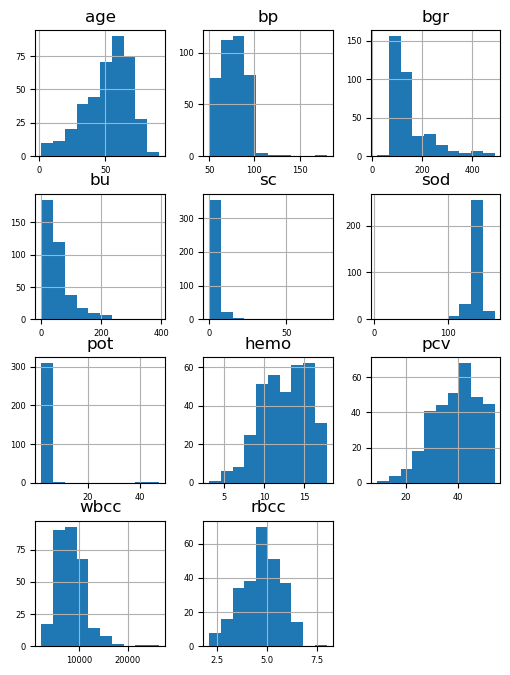

In [ ]:
## Check the distribution of each variable
df.hist(xlabelsize=6,ylabelsize=6,figsize=(6,8))

There are 400 observations and 25 variables in the dataset. After the transformation in Part 2. `sg`, `al`, `su` are Categorical variables now. `age`, `bp`, `bgr`, `bu`, `sod`, `pcv`, `wbcc`,`sc`,`pot`,`hemo`,and `rbcc` variables are all of type float. The rest of the variables are object(in this case Binary).

According to the data summary, the mean of observations under the `age` variable was about 51.48. The maximum and minimum age are 90 and 2 respectively, respectively. Also, the mean of `bp` (blood pressure) is about 76.47. But there may be some missing values and outliers in the dataset based on the data summary.

Also, we can find that most of them have the skewness problem by looking at the distribution of observations under each variable. So, this implies that there exist a lot of missing values and outliers in our dataset.

### **4. Association Between Variables**

Create a heatmap to find potential relationship between variables.

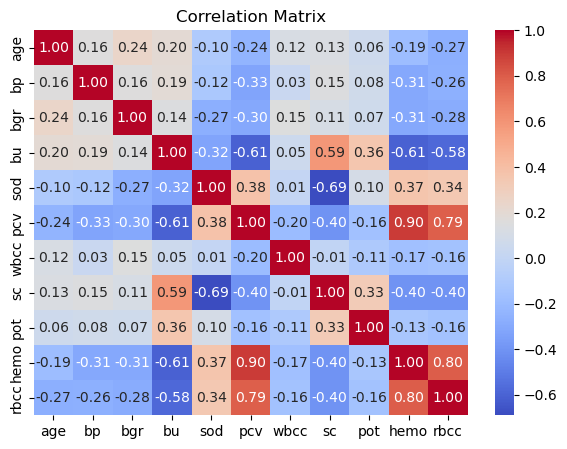

In [ ]:
num_col = ['age','bp','bgr','bu','sod','pcv','wbcc','sc','pot','hemo','rbcc']

# Compute the correlation matrix
correlation_matrix = df[num_col].corr()

# Plot the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Variables `sc` (serum creatinine) and `hemo` (hemoglobin) have a strong negative correlation (-0.61), suggesting that as serum creatinine levels increase, hemoglobin levels tend to decrease.

`pcv` (packed cell volume) and `hemo` (hemoglobin) show a strong positive correlation (0.90). This indicates that when the Packed cell volume rises, the amount of Hemoglbin will also increase. This may be because both are related to the blood's ability to carry oxygen.

`sod` (sodium) appears to have a moderate negative correlation with `bu` (blood urea) and `sc` (serum creatinine), which might suggest that higher levels of urea and creatinine in the blood are associated with lower sodium levels.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

df_cleaned = df[num_col].dropna()
vals = [VIF(df_cleaned, i)
        for i in range(1, df_cleaned.shape[1])]
vif = pd.DataFrame({'vif':vals}, index=df_cleaned.columns[1:])
vif

,vif
bp,33.314145
bgr,5.228453
bu,10.308152
sod,154.643905
pcv,106.157383
wbcc,10.830481
sc,7.157653
pot,3.696926
hemo,110.751640
rbcc,63.753595


From variance inflation factor, `sod`, `pcv` and `hemo` have extremely large value, this indicates that they have severe multicollinearity issues. To solve this problem, Ridge Regression/ PCA or LASSO will be applied in the next part. 

### **5. Missing Value Analysis and Handling**

In [ ]:
## Check the missing vlaue
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [ ]:
print(df.shape)

## Drop the missing values
df_dropna = df.dropna()
print(df_dropna.shape)


(400, 25)
(158, 25)


Based on the distribution of observed values for each variable in the dataset overview, we need to replace in those missing values in different ways. If the distribution is approximately normal, we choose to replace it with mean. If there is a skewness, we need to replace it in with median.

So, for `age`, `pcv`, `rbcc` variables. We choose to replace their missing values with mean. For the missing observations in the remaining variables, we replace them with median

In [ ]:
#| warning: false

mean_col = ['age','pcv','rbcc']
median_col = ['bp','bgr','bu','sod','wbcc','sc','pot','hemo']

for column in mean_col:
    df[column].fillna(df[column].mean(), inplace=True)

for column in median_col:
    df[column].fillna(df[column].median(), inplace=True)

In [ ]:
df.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd


In [ ]:
df.isna().sum()

age        0
bp         0
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr        0
bu         0
sc         0
sod        0
pot        0
hemo       0
pcv        0
wbcc       0
rbcc       0
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

### **6. Outlier Analysis**

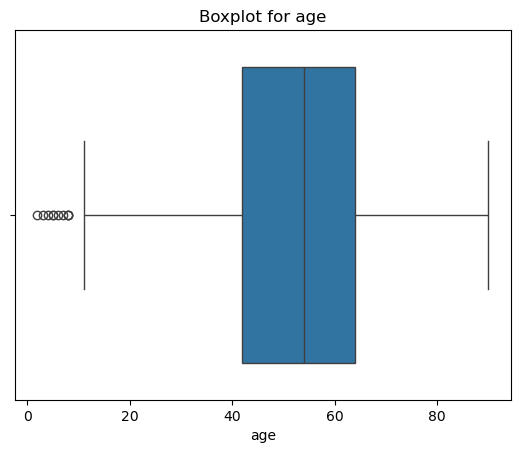

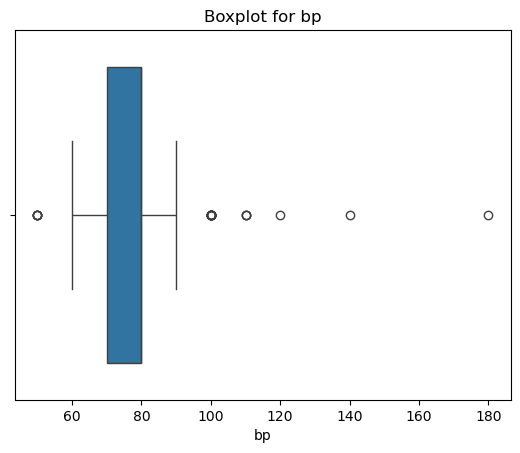

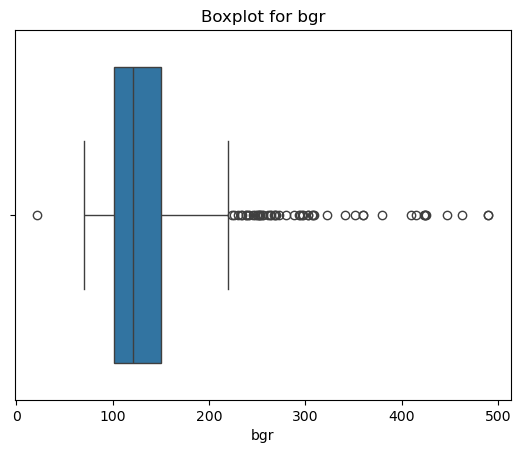

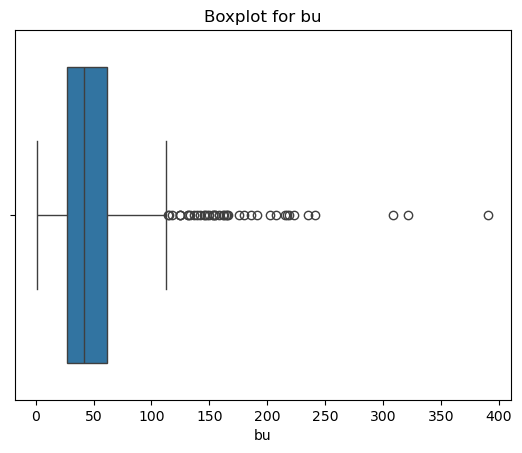

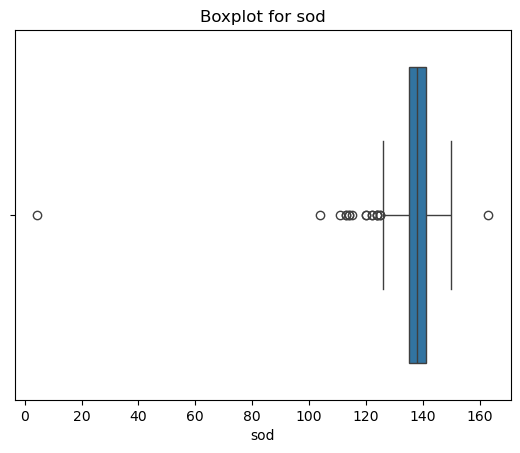

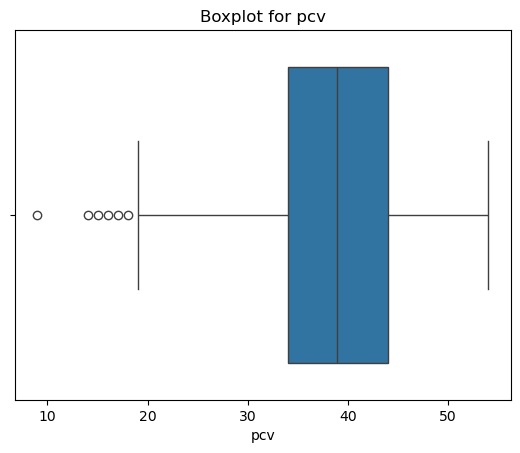

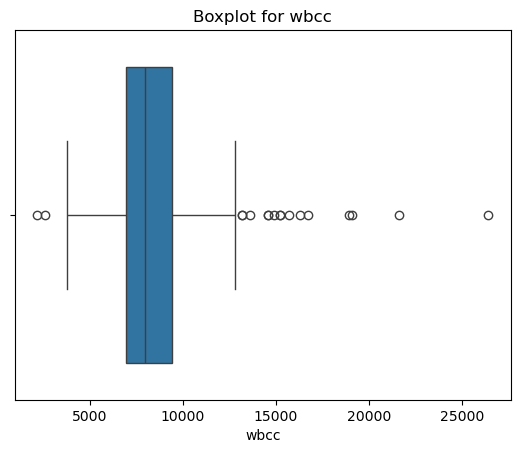

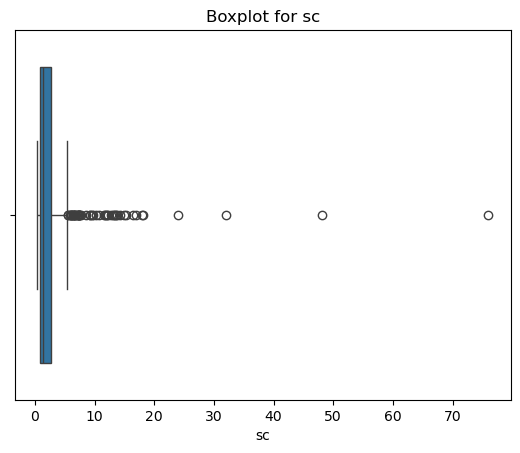

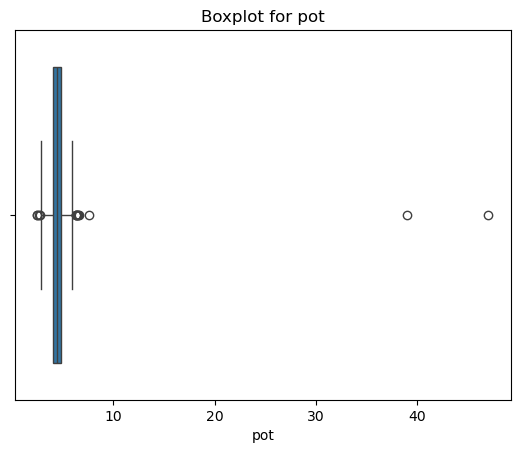

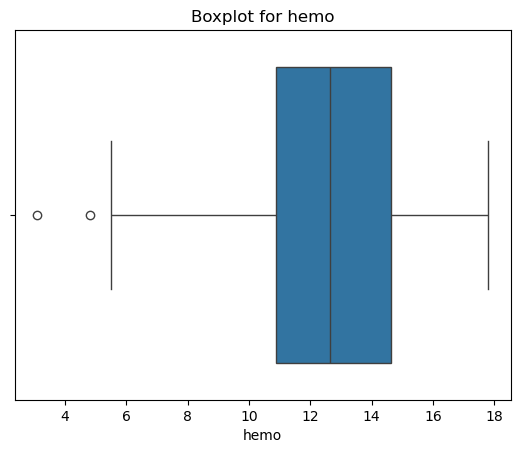

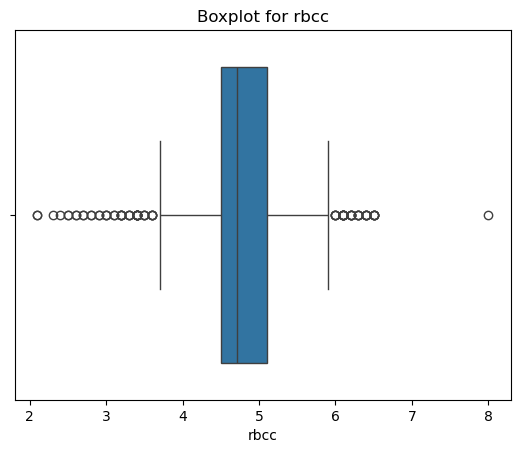

In [ ]:
for column in df[num_col].columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
for column in df[num_col].columns:
    # Q3
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    # Max val
    max_val = df[column].max()
    # .95
    np.quantile(df[column], 0.95)
    # outlier threshold
    threshold_max = Q3 + 1.5 * (Q3 - df[column].quantile(0.25))
    threshold_min = Q1 - 1.5 * (Q3 - df[column].quantile(0.25))
    # replace outlier with 95%
    df[column] = np.where(
        df[column] > threshold_max, 
        threshold_max, 
        df[column]
        )
    
    df[column] = np.where(
        df[column] < threshold_min, 
        threshold_min, 
        df[column]
        )


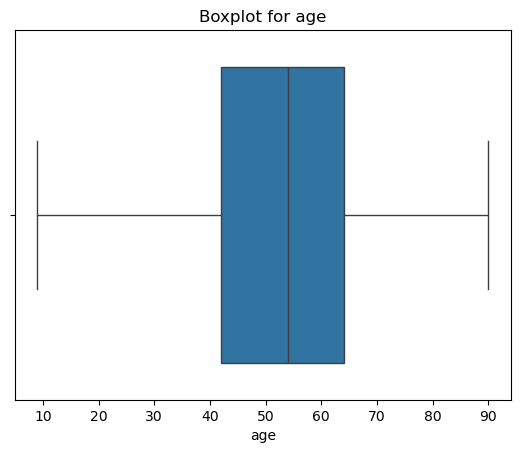

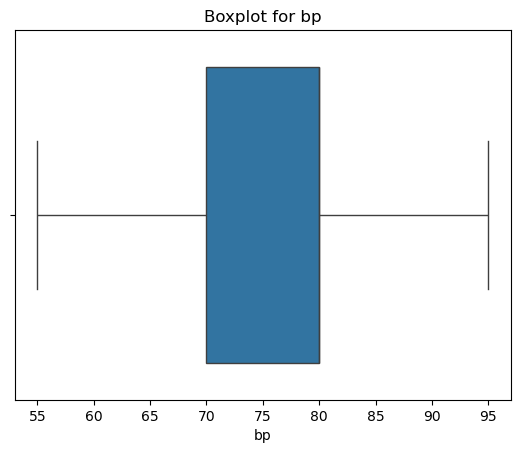

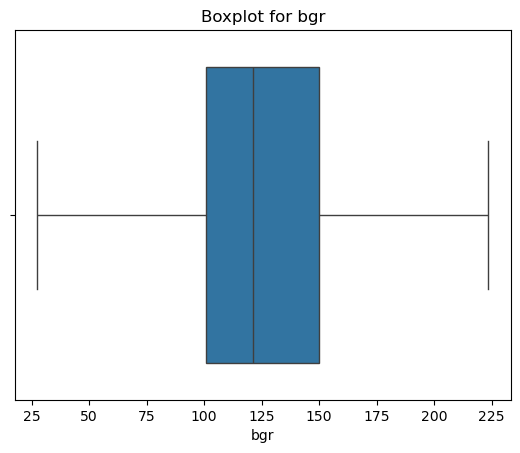

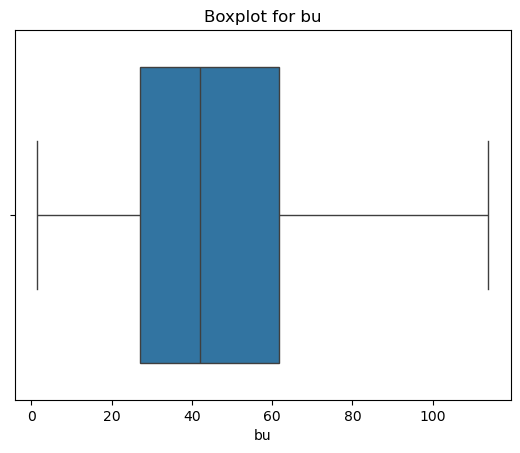

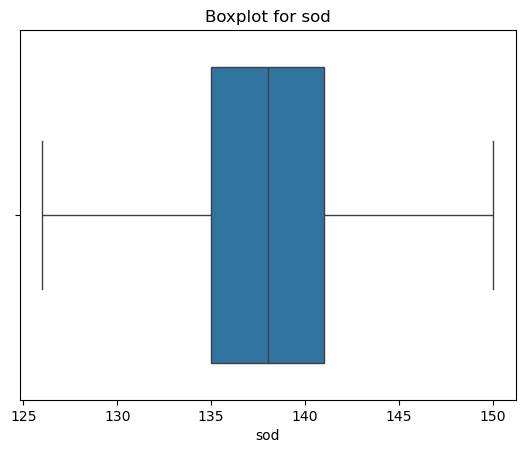

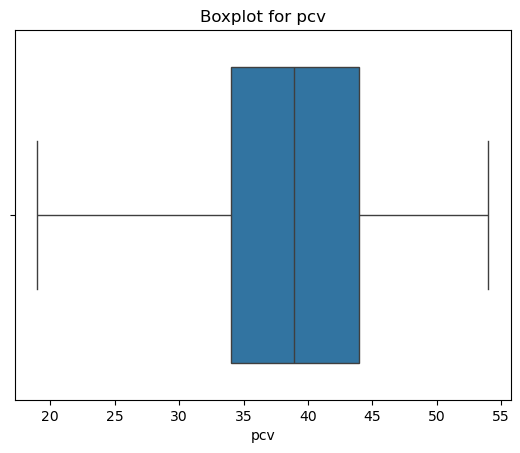

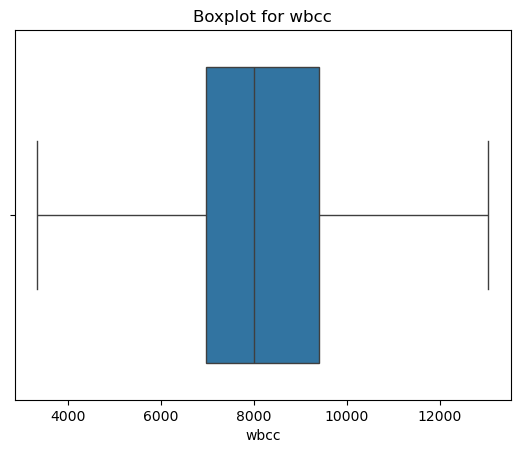

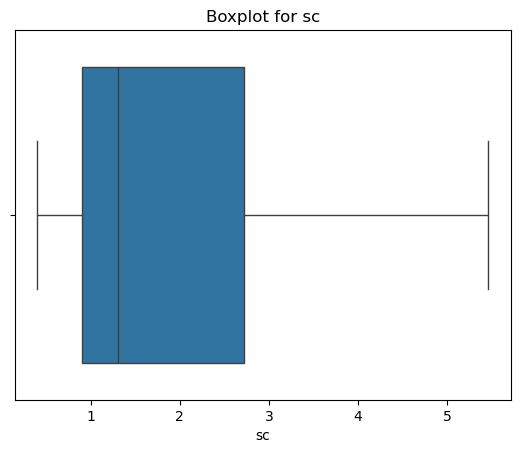

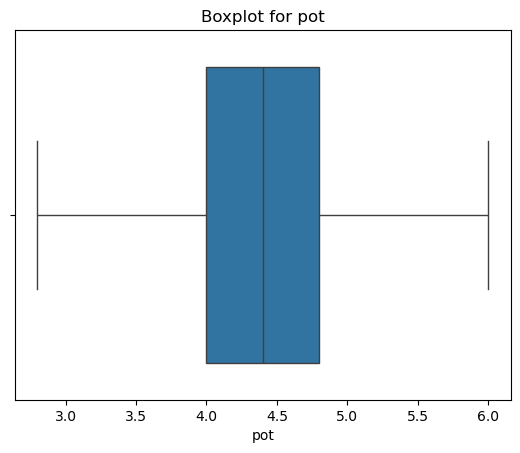

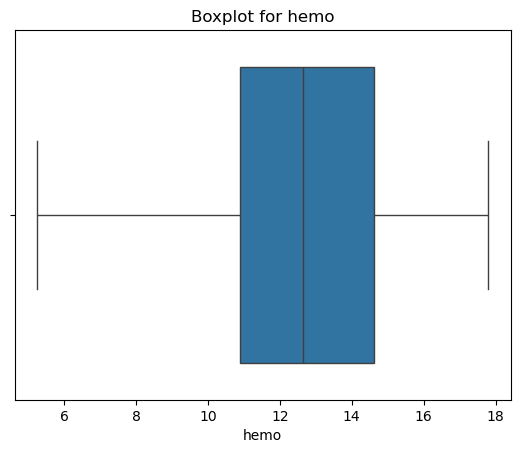

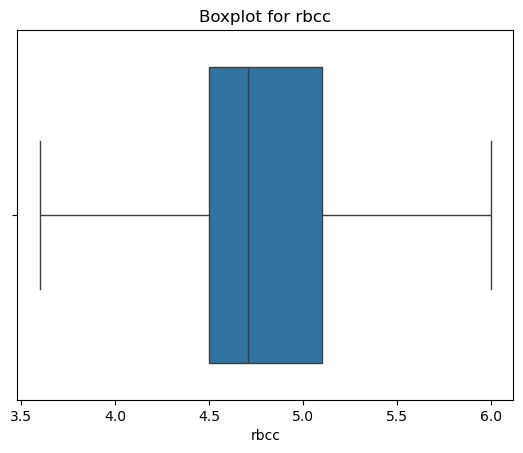

In [ ]:
for column in df[num_col].columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

For the rest of the outliers we remove them .

### **7. Sub-group Analysis**

In [ ]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis

In [ ]:
df[num_col].mean()

age       51.568376
bp        75.825000
bgr      134.011250
bu        50.277687
sod      138.217500
pcv       38.946998
wbcc    8169.093750
sc         2.071406
pot        4.382750
hemo      12.549000
rbcc       4.739435
dtype: float64

In [ ]:
df[num_col].var()

age     2.805060e+02
bp      1.203703e+02
bgr     2.124512e+03
bu      9.171178e+02
sod     2.780972e+01
pcv     6.355595e+01
wbcc    4.123827e+06
sc      2.659236e+00
pot     4.035864e-01
hemo    7.272142e+00
rbcc    4.554516e-01
dtype: float64

for numial mean and variance, they have huge difference. Hence we need to applied PCA

In [ ]:
X = pd.DataFrame(scale(df[num_col]), index=df[num_col].index, columns=df[num_col].columns)

In [ ]:
X.var()

age     1.002506
bp      1.002506
bgr     1.002506
bu      1.002506
sod     1.002506
pcv     1.002506
wbcc    1.002506
sc      1.002506
pot     1.002506
hemo    1.002506
rbcc    1.002506
dtype: float64

almost good, profomance is good

In [ ]:
pca_X = PCA()

In [ ]:
pc_scores = pd.DataFrame(pca_X.fit_transform(X), columns=X.columns, index=X.index)
pc_scores.head(6)

,age,bp,bgr,bu,sod,pcv,wbcc,sc,pot,hemo,rbcc
0,-1.377313,0.181170,0.256405,-0.488506,-0.233391,0.143336,-0.381029,0.485817,-0.188193,-0.030618,-0.280403
1,-1.374599,1.152775,-2.206437,0.465920,0.306722,-2.076440,0.416613,-0.523060,0.291467,0.147472,0.174688
2,1.443902,-0.632647,0.761014,-0.945003,0.342212,-1.077057,0.181564,-0.678242,0.896326,-0.351457,0.055703
3,1.672576,-0.394049,-2.950485,-1.322924,1.203892,0.755625,0.434604,0.340153,-0.430838,0.501795,-0.384273
4,-0.120017,0.333701,-0.231871,-0.369706,-0.499931,-0.153625,1.020044,0.373014,0.357384,0.173288,-0.049255
5,-0.687969,-0.703091,-0.571798,-1.108850,-1.145494,1.521896,1.662697,-0.214835,-0.044042,0.029513,0.096427


In [ ]:
pc_scores.var()

age     4.410607
bp      1.173353
bgr     1.089303
bu      0.905189
sod     0.855245
pcv     0.779201
wbcc    0.627884
sc      0.541232
pot     0.337001
hemo    0.165607
rbcc    0.142947
dtype: float64

use first 3 for their eigenvalue > 1

In [ ]:
np.sqrt(pca_X.explained_variance_)

array([2.10014457, 1.08321403, 1.0436969 , 0.95141439, 0.92479438,
       0.88272383, 0.79239106, 0.73568446, 0.58051813, 0.40694891,
       0.37808273])

In [ ]:
pca_X.explained_variance_

array([4.41060722, 1.17335265, 1.08930322, 0.90518934, 0.85524465,
       0.77920136, 0.62788359, 0.54123163, 0.3370013 , 0.16560742,
       0.14294655])

In [ ]:
pca_X.explained_variance_ratio_

array([0.39996188, 0.10640175, 0.09878   , 0.08208422, 0.07755514,
       0.0706594 , 0.05693763, 0.04907987, 0.03055989, 0.01501758,
       0.01296265])

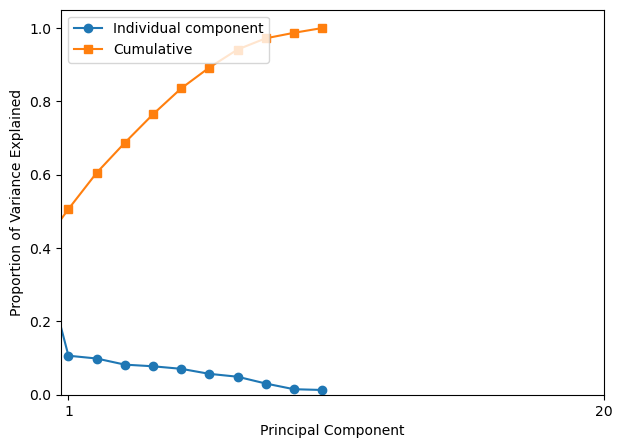

In [ ]:
plt.figure(figsize=(7,5))

plt.plot(pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot( np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,20])
plt.legend(loc=2);

### **8. Data Splitting**

### **9. Classifier Choices**

### **10. Performance Metrics**

### **11. Feature Selection/Extraction**

### **12. Classifier Comparison**

### **13. Interpretable Classifier Insight**

### **14. [Bonus] Sub-group Improvement Strategy**

### **15. Team Contributions**

### **16. Link to the public GitHub repository**

https://github.com/Barkesty/Project-Chronic-Kidney-Disease-Classification-Challenge.git